In [4]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "C:/bh010/!!BH File 1/Sales Analysis Class 4/Sales.csv"  
df = pd.read_csv("Sales.csv")


print("Number of missing values:")
print(df.isna().sum())

# We'll use Min-Max normalization for simplicity.

def min_max_normalization(x):
    return (x - x.min()) / (x.max() - x.min())

df['Unit_normalized'] = min_max_normalization(df['Unit'])
df['Sales_normalized'] = min_max_normalization(df['Sales'])

# Let's drop the original 'Unit' and 'Sales' columns as they are no longer needed.
df.drop(columns=['Unit', 'Sales'], inplace=True)

# Total sales by 'State'
total_sales_by_state = df.groupby('State')['Sales_normalized'].sum()
print("\nTotal sales by State:")
print(total_sales_by_state)

# Total sales by 'Group'
total_sales_by_group = df.groupby('Group')['Sales_normalized'].sum()
print("\nTotal sales by Group:")
print(total_sales_by_group)

# Saving the cleaned and normalized data to a new CSV file
df.to_csv("data1.csv", index=False)


Number of missing values:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Total sales by State:
State
NSW    441.714286
NT     109.079365
QLD    177.888889
SA     339.412698
TAS    110.222222
VIC    635.968254
WA     106.365079
Name: Sales_normalized, dtype: float64

Total sales by Group:
Group
Kids       480.142857
Men        484.444444
Seniors    473.571429
Women      482.492063
Name: Sales_normalized, dtype: float64


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Sales.csv")

# Descriptive statistical analysis on 'Sales' and 'Unit' columns
sales_stats = df[['Sales', 'Unit']].describe()
print("Descriptive Statistical Analysis:")
print(sales_stats)

# Determine which group is generating the highest and lowest sales
group_sales = df.groupby('Group')['Sales'].sum()
highest_group_sales = group_sales.idxmax()
lowest_group_sales = group_sales.idxmin()
print("\nGroup generating the highest sales:", highest_group_sales)
print("Group generating the lowest sales:", lowest_group_sales)

# Determine which state is generating the highest and lowest sales
state_sales = df.groupby('State')['Sales'].sum()
highest_state_sales = state_sales.idxmax()
lowest_state_sales = state_sales.idxmin()
print("\nState generating the highest sales:", highest_state_sales)
print("State generating the lowest sales:", lowest_state_sales)

# Generate weekly, monthly, and quarterly reports for the analysis made
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime
df.set_index('Date', inplace=True)  # Set 'Date' column as index

# Weekly report
weekly_report = df.resample('W').sum()
print("\nWeekly Report:")
print(weekly_report)

# Monthly report
monthly_report = df.resample('M').sum()
print("\nMonthly Report:")
print(monthly_report)

# Quarterly report
quarterly_report = df.resample('Q').sum()
print("\nQuarterly Report:")
print(quarterly_report)


Descriptive Statistical Analysis:
               Sales         Unit
count    7560.000000  7560.000000
mean    45013.558201    18.005423
std     32253.506944    12.901403
min      5000.000000     2.000000
25%     20000.000000     8.000000
50%     35000.000000    14.000000
75%     65000.000000    26.000000
max    162500.000000    65.000000

Group generating the highest sales:  Men
Group generating the lowest sales:  Seniors

State generating the highest sales:  VIC
State generating the lowest sales:  WA

Weekly Report:
                                                         Time  \
Date                                                            
2020-10-04   Morning Morning Morning Morning Afternoon Aft...   
2020-10-11   Morning Morning Morning Morning Afternoon Aft...   
2020-10-18   Morning Morning Morning Morning Afternoon Aft...   
2020-10-25   Morning Morning Morning Morning Afternoon Aft...   
2020-11-01   Morning Morning Morning Morning Afternoon Aft...   
2020-11-08   Morning M

C:\Users\bh010\AppData\Local\Temp\ipykernel_740560\950345323.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_report = df.resample('M').sum()
C:\Users\bh010\AppData\Local\Temp\ipykernel_740560\950345323.py:41: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_report = df.resample('Q').sum()


C:\Users\bh010\AppData\Local\Temp\ipykernel_737392\2719085240.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='State', y='Sales', hue='Group', ci=None)


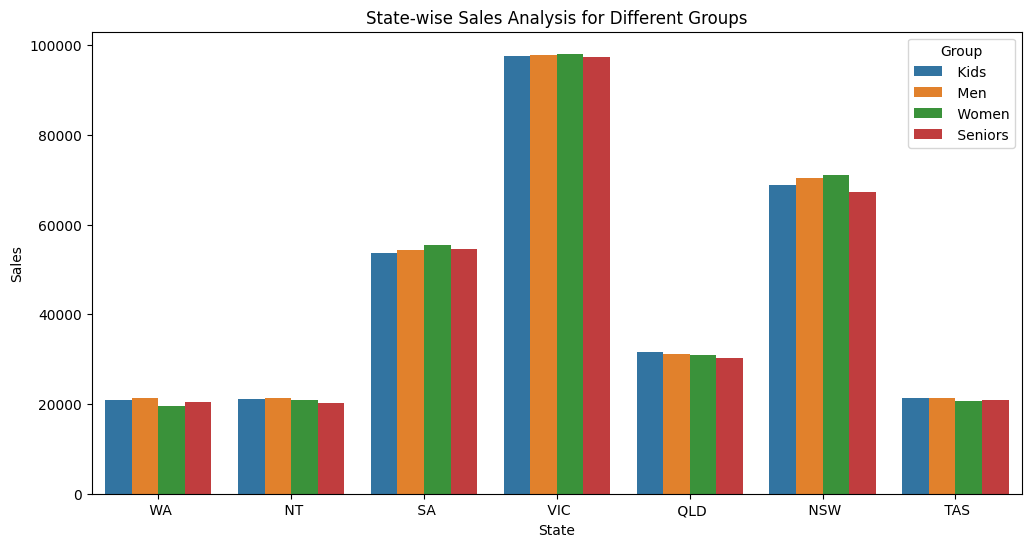

C:\Users\bh010\AppData\Local\Temp\ipykernel_737392\2719085240.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Group', y='Sales', hue='State', ci=None)


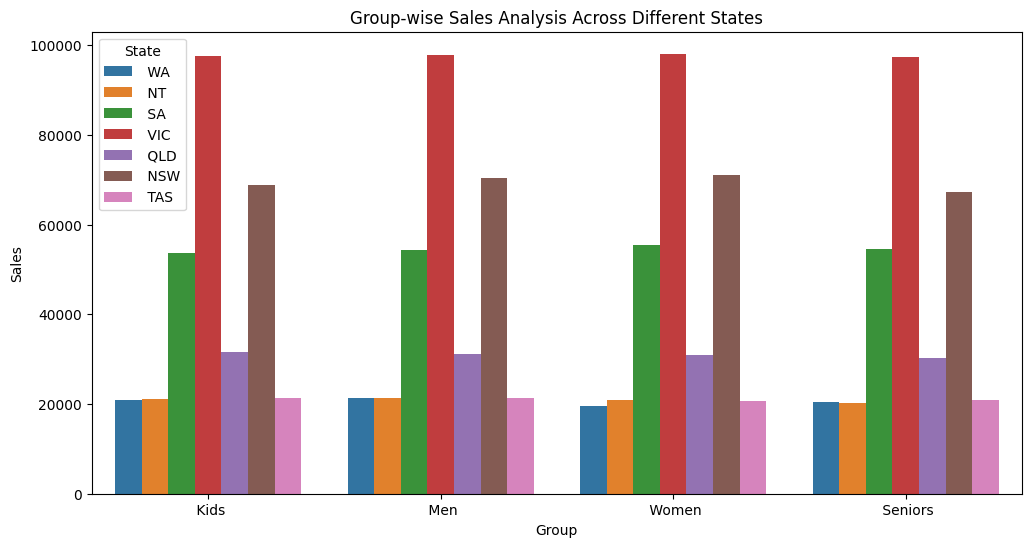

C:\Users\bh010\AppData\Local\Temp\ipykernel_737392\2719085240.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=time_sales, x='Time', y='Sales', ci=None)


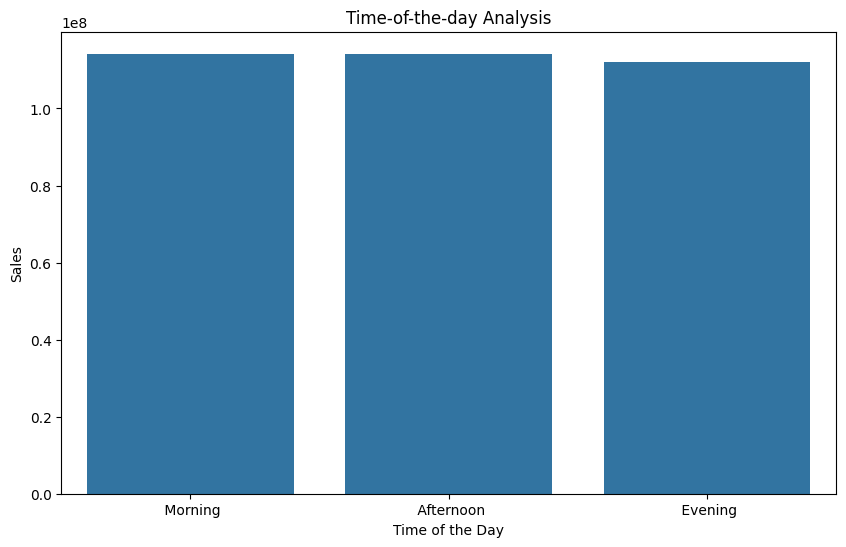

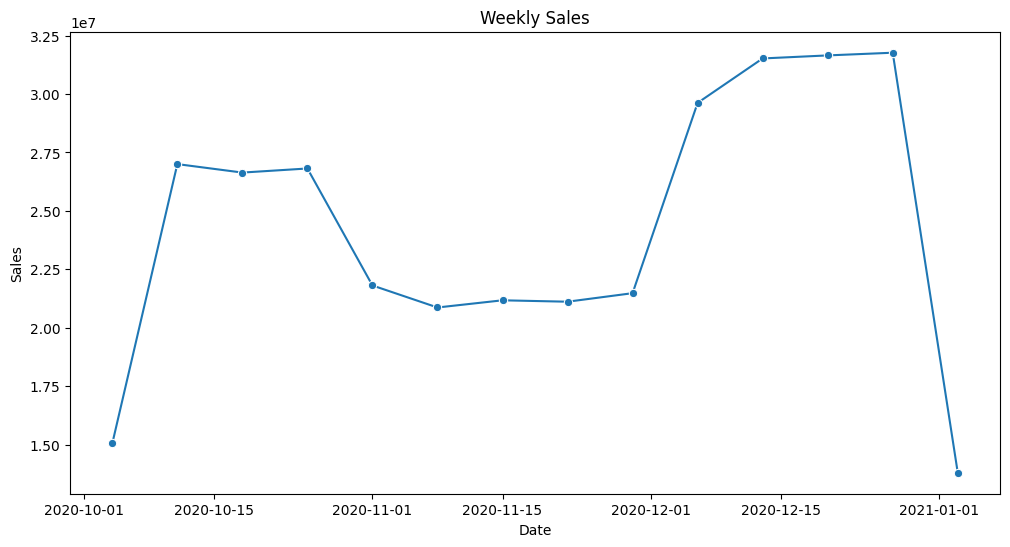

C:\Users\bh010\AppData\Local\Temp\ipykernel_737392\2719085240.py:51: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date')['Sales'].sum().reset_index()


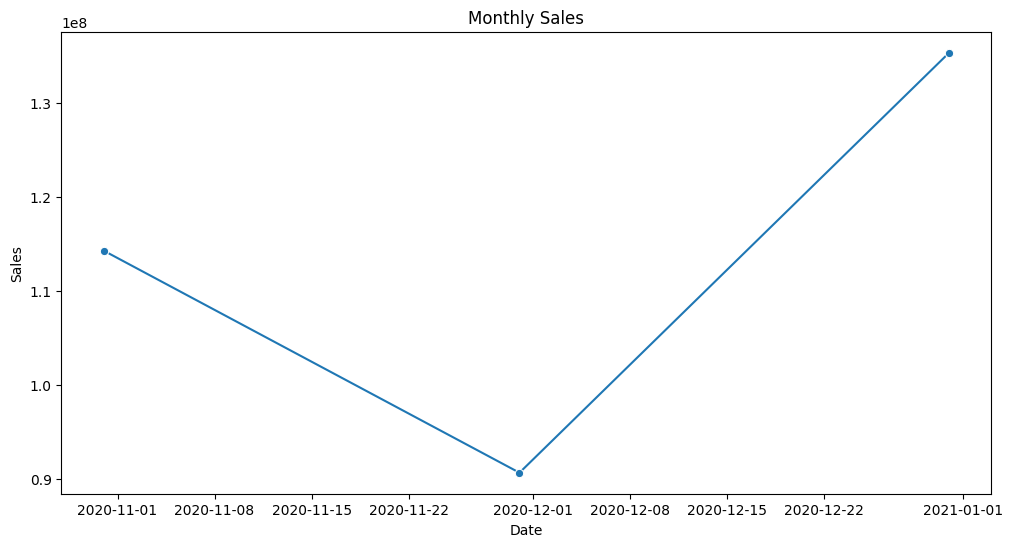

C:\Users\bh010\AppData\Local\Temp\ipykernel_737392\2719085240.py:61: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = df.resample('Q', on='Date')['Sales'].sum().reset_index()


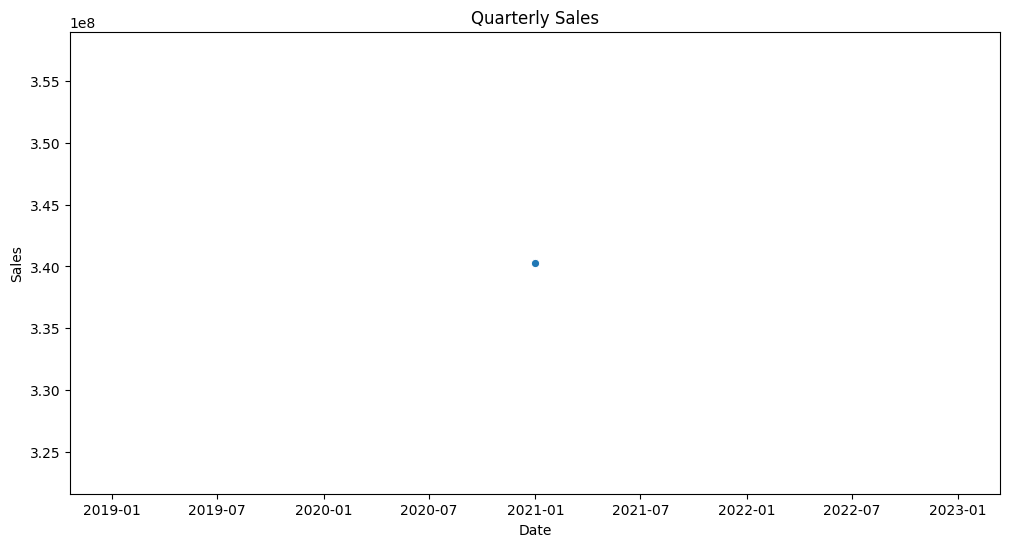

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Sales.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# State-wise sales analysis for different groups
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='State', y='Sales', hue='Group', ci=None)
plt.title('State-wise Sales Analysis for Different Groups')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Group')
plt.show()

# Group-wise sales analysis across different states
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Group', y='Sales', hue='State', ci=None)
plt.title('Group-wise Sales Analysis Across Different States')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.legend(title='State')
plt.show()

# Time-of-the-day analysis
time_sales = df.groupby('Time')['Sales'].sum().reset_index()
time_sales = time_sales.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=time_sales, x='Time', y='Sales', ci=None)
plt.title('Time-of-the-day Analysis')
plt.xlabel('Time of the Day')
plt.ylabel('Sales')
plt.show()

# Weekly charts
weekly_sales = df.resample('W', on='Date')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_sales, x='Date', y='Sales', marker='o')
plt.title('Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Monthly charts
monthly_sales = df.resample('M', on='Date')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Date', y='Sales', marker='o')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Quarterly charts
quarterly_sales = df.resample('Q', on='Date')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=quarterly_sales, x='Date', y='Sales', marker='o')
plt.title('Quarterly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()



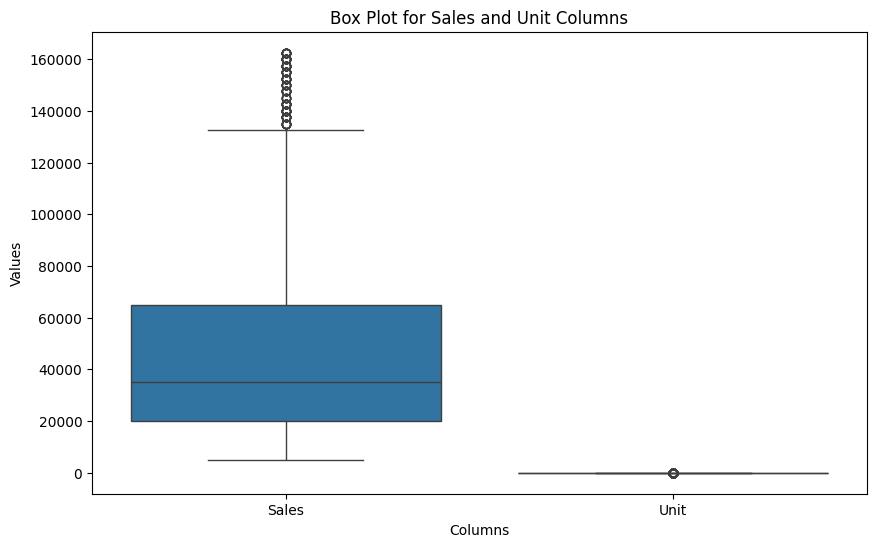

C:\Users\bh010\AppData\Local\Temp\ipykernel_737392\1499053520.py:55: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='State', y='Sales', hue='Group', ci=None)


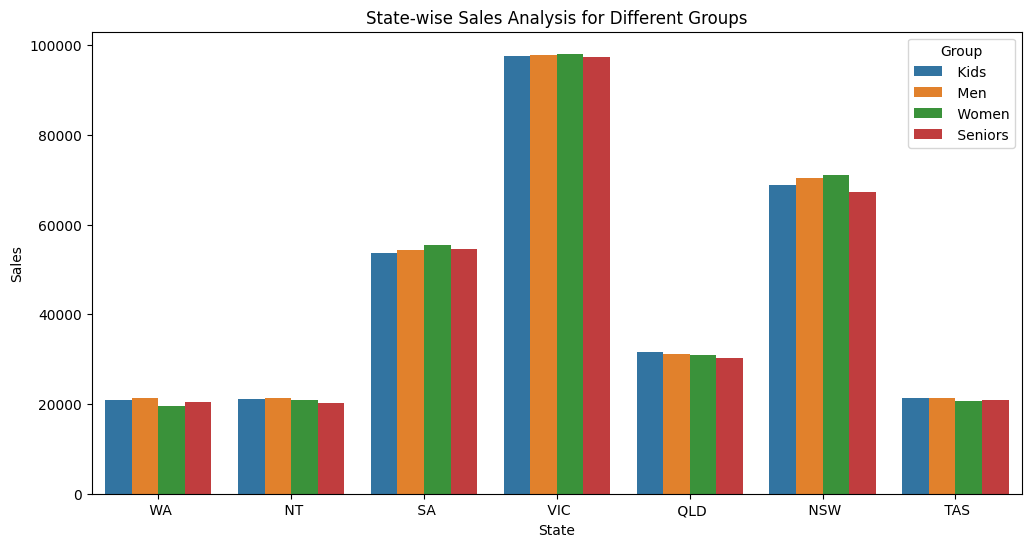

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "your_file_path_here.csv"  # Replace "your_file_path_here.csv" with the actual path to your CSV file
df = pd.read_csv("Sales.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Markdown for Report Introduction
"""
# Sales Analysis Report

This report presents an analysis of sales data for a specific period. We'll perform data wrangling, analysis, and visualization to gain insights into sales performance.

"""

# Data Wrangling Section
"""

""".format(df.shape, df.columns.tolist(), df.dtypes, df.isnull().sum())

# Descriptive Statistical Analysis Section
"""
## Descriptive Statistical Analysis

### Sales and Unit Columns

#### Summary Statistics:
{}
""".format(df[['Sales', 'Unit']].describe())

# Box Plot for Sales and Unit Columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Sales', 'Unit']])
plt.title('Box Plot for Sales and Unit Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

# Recommendations for Descriptive Statistics
"""

"""

# Data Visualization Section
"""

"""

# State-wise Sales Analysis for Different Groups
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='State', y='Sales', hue='Group', ci=None)
plt.title('State-wise Sales Analysis for Different Groups')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Group')
plt.show()



